In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from boruta import BorutaPy
from scipy.stats import uniform, randint

In [2]:
# Load DataSet
df=pd.read_csv('data/train.csv')

**Check basic info on the data set**

In [3]:
# Displaying the First Five Rows
df.head()

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1/1/2018 0:15,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,1/1/2018 0:30,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,1/1/2018 0:45,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,1/1/2018 1:00,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,1/1/2018 1:15,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82


Data Description:

In [4]:
# DataFrame Dimensions
data_shape = df.shape
data_shape

(27999, 11)

In [5]:
num_rows = data_shape[0]
num_columns = data_shape[1]
print("Number of Samples:", num_rows)
print("Number of Features:", num_columns)

Number of Samples: 27999
Number of Features: 11


In [6]:
df.columns

Index(['date', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Usage_kWh'],
      dtype='object')

In [7]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lagging_Current_Reactive.Power_kVarh,27999.0,13.230912,16.469935,0.00,2.74,5.04,22.82,96.91
Leading_Current_Reactive_Power_kVarh,27880.0,3.881065,7.495718,0.00,0.00,0.00,2.23,27.76
CO2(tCO2),27999.0,0.011790,0.016354,0.00,0.00,0.00,0.02,0.07
Lagging_Current_Power_Factor,27999.0,79.940163,19.397474,36.94,61.64,87.99,99.08,100.00
Leading_Current_Power_Factor,27923.0,84.479796,30.422037,12.50,99.81,100.00,100.00,100.00
NSM,27999.0,42718.611379,24933.404759,0.00,20700.00,42300.00,63900.00,85500.00
Usage_kWh,27999.0,27.888785,33.919271,2.45,3.13,4.57,51.19,153.14


In [8]:
# Display a summary of the DataFrame, including column names, data types, and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  27999 non-null  object 
 1   Lagging_Current_Reactive.Power_kVarh  27999 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  27880 non-null  float64
 3   CO2(tCO2)                             27999 non-null  float64
 4   Lagging_Current_Power_Factor          27999 non-null  float64
 5   Leading_Current_Power_Factor          27923 non-null  float64
 6   NSM                                   27999 non-null  int64  
 7   WeekStatus                            26225 non-null  object 
 8   Day_of_week                           26225 non-null  object 
 9   Load_Type                             27999 non-null  object 
 10  Usage_kWh                             27999 non-null  float64
dtypes: float64(6), 

 **Exploratory Data Analysis (EDA)**



Pairplots using seaborn

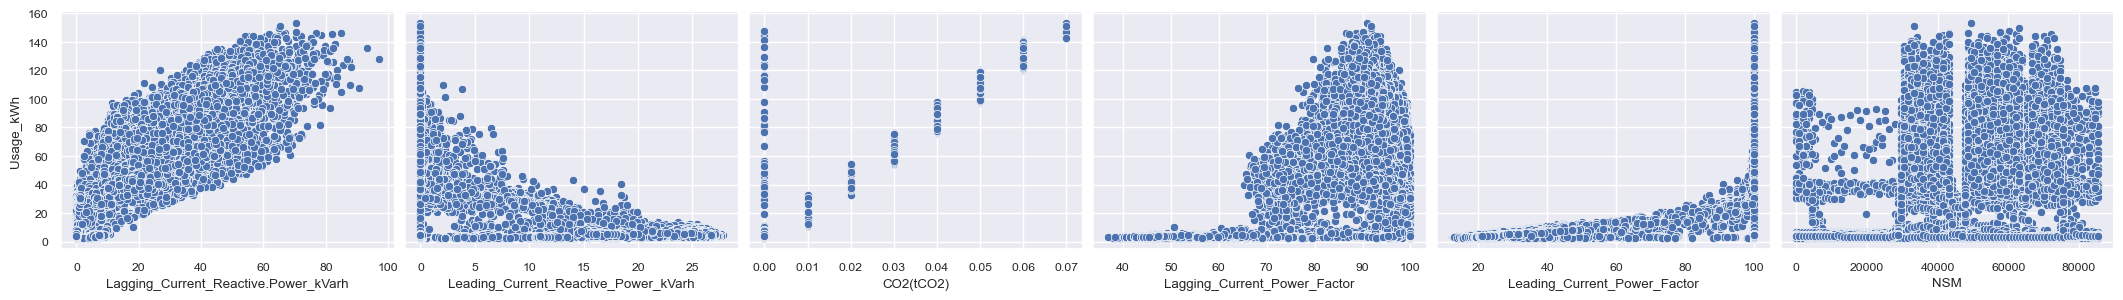

In [23]:
cols = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
        'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

sns.pairplot(df, x_vars=cols, y_vars='Usage_kWh', height=3, aspect=1.2, kind='scatter')
plt.show()

Average Usage by Week Status


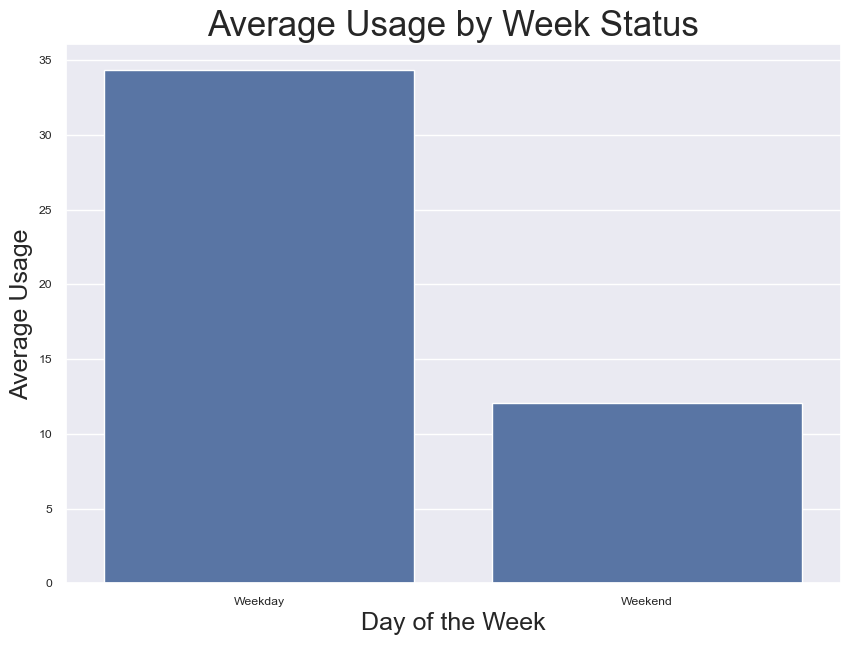

In [24]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Week Status", fontsize=25)
plt.show()




Average Usage by Day of the Week

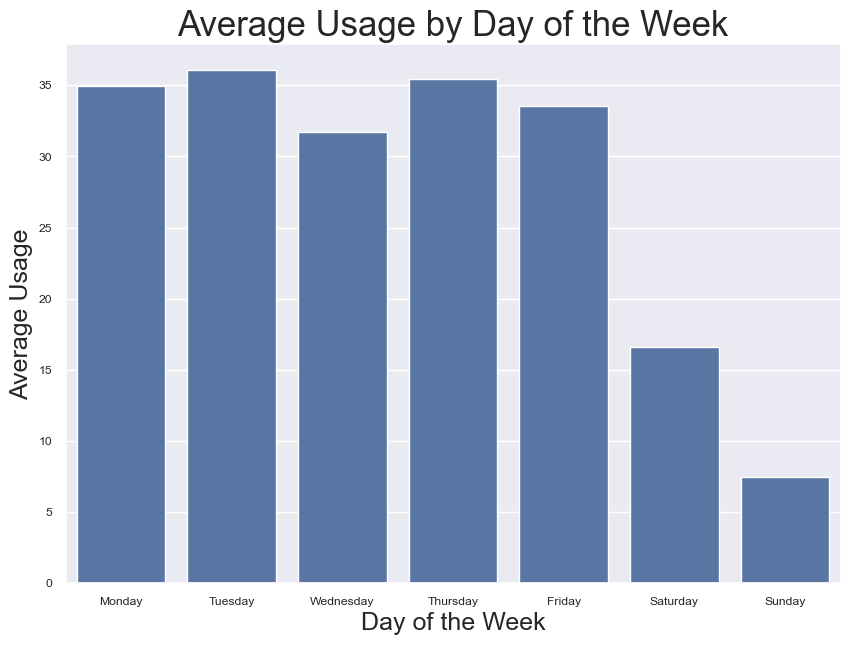

In [25]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="Day_of_week", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Day of the Week", fontsize=25)
plt.show()


Energy Consumption by Week Status and Load Type


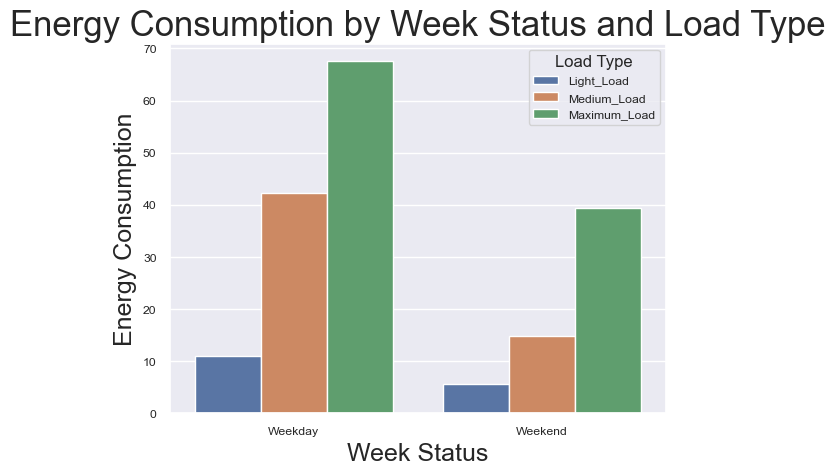

In [26]:
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh", hue="Load_Type",errorbar=None)
plt.xlabel("Week Status", fontsize=18)
plt.ylabel("Energy Consumption", fontsize=18)
plt.title("Energy Consumption by Week Status and Load Type", fontsize=25)
plt.legend(title="Load Type", title_fontsize=12)
plt.show()


Correlation Matrix 

In [4]:
df.set_index('date', inplace=True)

Correlation Heatmap

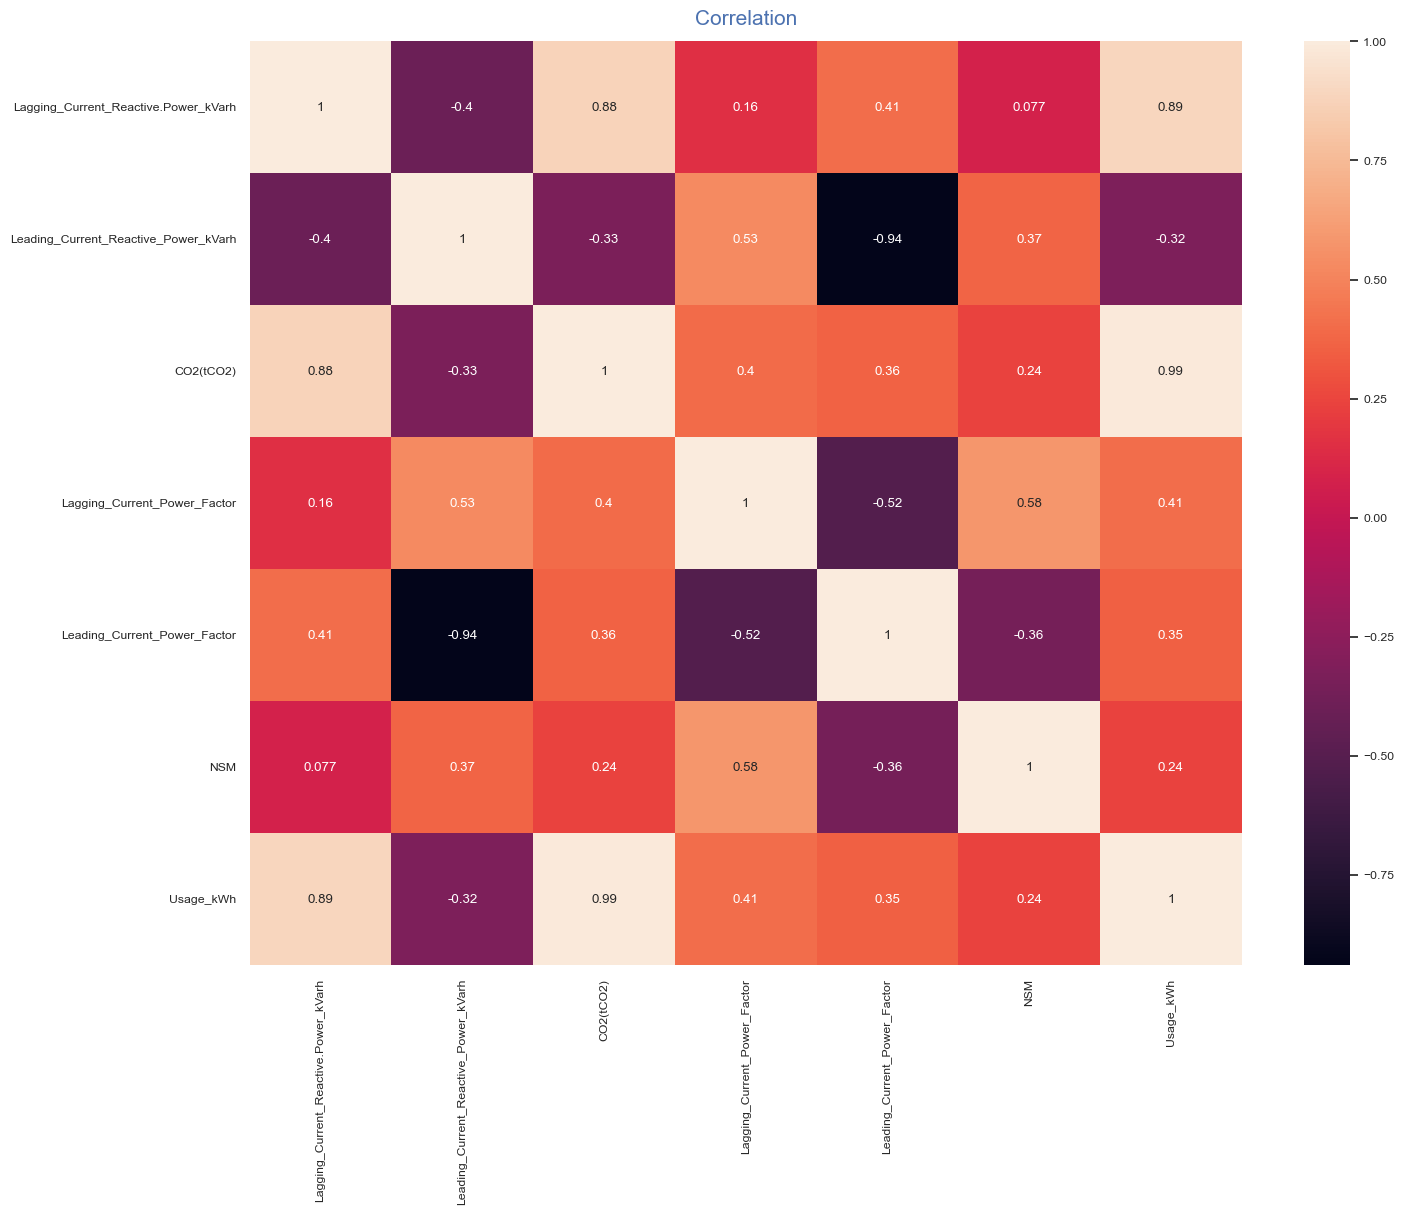

In [28]:
numeric_df = df.select_dtypes(include=['number'])

sns.set(font_scale=0.8)
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

**Handling Missing And Categorical data**

In [5]:
from sklearn.impute import SimpleImputer

numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

imputer_numerical = SimpleImputer(strategy='mean')
df[numerical_features] = imputer_numerical.fit_transform(df[numerical_features])

imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_categorical.fit_transform(df[categorical_features])

print("DataFrame after dropping rows with less than 200 missing values and imputing missing values:")
print(df)

df_cleaned = df.copy()

# missing_value_counts = df.isna().sum()

# df_cleaned = df.dropna()

# print("DataFrame after dropping missing values:")
# print(df_cleaned)

missing_values = df_cleaned.isna().sum()
missing_values

DataFrame after dropping rows with less than 200 missing values and imputing missing values:
                  Lagging_Current_Reactive.Power_kVarh  \
date                                                     
1/1/2018 0:15                                     2.95   
1/1/2018 0:30                                     4.46   
1/1/2018 0:45                                     3.28   
1/1/2018 1:00                                     3.56   
1/1/2018 1:15                                     4.50   
...                                                ...   
19/10/2018 14:45                                 32.62   
19/10/2018 15:00                                 35.46   
19/10/2018 15:15                                 30.92   
19/10/2018 15:30                                 58.18   
19/10/2018 15:45                                 40.46   

                  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                
1/1/2018 0:15 

Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64

In [11]:
df.dtypes

Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                     float64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
Usage_kWh                               float64
dtype: object

In [273]:
from datetime import datetime, timedelta

date_column = 'date'

df_cleaned[date_column] = pd.to_datetime(df_cleaned[date_column], format='%d/%m/%Y %H:%M')

df_cleaned['time_since_start_of_day_minutes'] = df_cleaned[date_column].dt.hour * 60 + df_cleaned[date_column].dt.minute
df_cleaned['time_since_start_of_day_seconds'] = df_cleaned[date_column].dt.hour * 3600 + df_cleaned[date_column].dt.minute * 60 + df_cleaned[date_column].dt.second

df_cleaned['start_of_week'] = df_cleaned[date_column] - pd.to_timedelta(df_cleaned[date_column].dt.dayofweek, unit='D')
df_cleaned['time_since_start_of_week_minutes'] = (df_cleaned[date_column] - df_cleaned['start_of_week']).dt.total_seconds() // 60
df_cleaned['time_since_start_of_week_seconds'] = (df_cleaned[date_column] - df_cleaned['start_of_week']).dt.total_seconds()

df_cleaned['start_of_month'] = df_cleaned[date_column].dt.to_period('M').dt.to_timestamp()
df_cleaned['time_since_start_of_month_minutes'] = (df_cleaned[date_column] - df_cleaned['start_of_month']).dt.total_seconds() // 60
df_cleaned['time_since_start_of_month_seconds'] = (df_cleaned[date_column] - df_cleaned['start_of_month']).dt.total_seconds()

df_cleaned.drop(columns=[date_column, 'start_of_week', 'start_of_month'], inplace=True)

print(df_cleaned.head())


   Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  \
0                                  2.95                                   0.0   
1                                  4.46                                   0.0   
2                                  3.28                                   0.0   
3                                  3.56                                   0.0   
4                                  4.50                                   0.0   

   CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
0        0.0                         73.21                         100.0   
1        0.0                         66.77                         100.0   
2        0.0                         70.28                         100.0   
3        0.0                         68.09                         100.0   
4        0.0                         64.72                         100.0   

      NSM WeekStatus Day_of_week   Load_Type  Usage_kWh 

In [ ]:
df_cleaned['Reactive_Power_Ratio'] = df_cleaned['Lagging_Current_Reactive.Power_kVarh'] / df_cleaned['Leading_Current_Reactive_Power_kVarh']
df_cleaned['Reactive_Power_Ratio'] = df_cleaned['Reactive_Power_Ratio'].replace(np.inf, np.nan)
df_cleaned['Reactive_Power_Ratio'].fillna(9999, inplace=True)
df_cleaned['Power_Factor_Difference'] = df_cleaned['Lagging_Current_Power_Factor'] - df_cleaned['Leading_Current_Power_Factor']

In [6]:
# Perform one-hot encoding on categorical variables
df_cleaned = pd.get_dummies(df_cleaned)

In [7]:
df_cleaned.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,,,,
1/1/2018 0:15,2.95,0.0,0.0,73.21,100.0,900.0,3.17,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 0:30,4.46,0.0,0.0,66.77,100.0,1800.0,4.00,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 0:45,3.28,0.0,0.0,70.28,100.0,2700.0,3.24,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 1:00,3.56,0.0,0.0,68.09,100.0,3600.0,3.31,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 1:15,4.50,0.0,0.0,64.72,100.0,4500.0,3.82,True,False,False,True,False,False,False,False,False,True,False,False


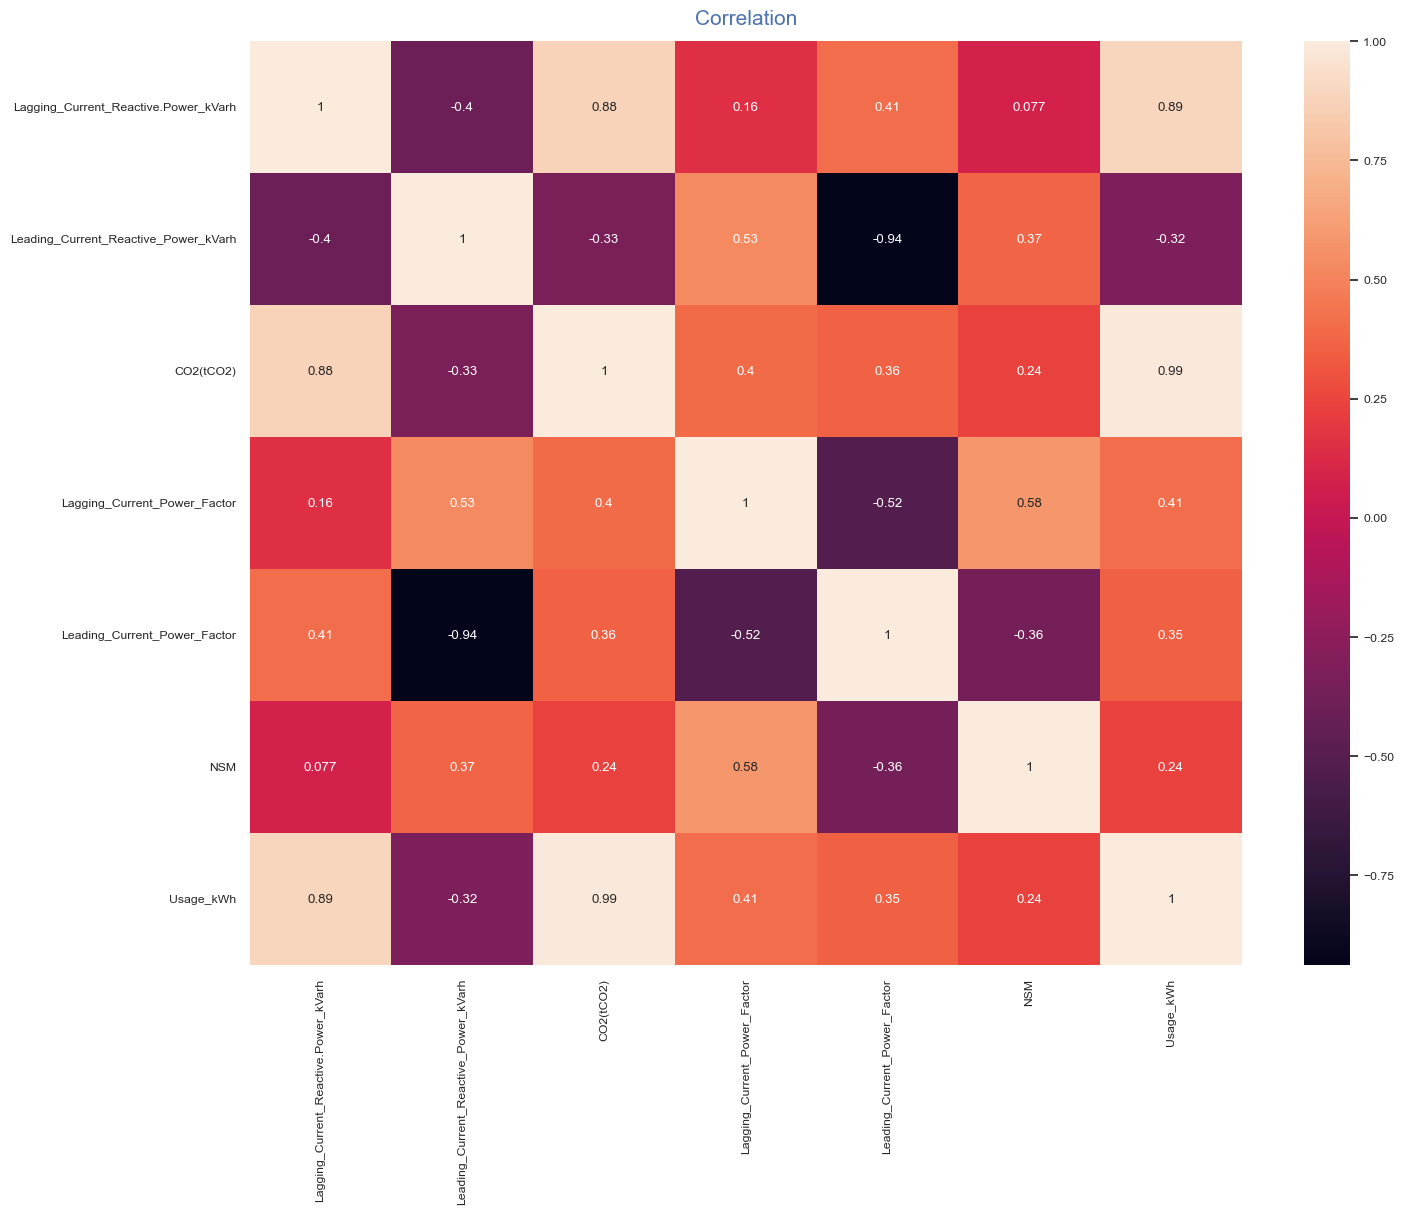

In [8]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

sns.set(font_scale=0.8)
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [129]:
df_cleaned.to_csv('processed.csv', index=False)

**Data Preprocessing**

 Splitting the DataFrame






In [9]:
#Independent Features
X = df_cleaned.drop(['Usage_kWh'], axis=1)  
#Dependent Feature/Target
y=df_cleaned.Usage_kWh

*Feature Selection*


In [10]:
y_ = y.astype('int')

select_reg = SelectKBest(k=7, score_func=f_regression).fit(X, y_)
X_select = select_reg.transform(X)

In [11]:
Selected_features = pd.DataFrame({'columns': X.columns, 'Kept': select_reg.get_support()})
Selected_features

,columns,Kept
0,Lagging_Current_Reactive.Power_kVarh,True
1,Leading_Current_Reactive_Power_kVarh,True
2,CO2(tCO2),True
3,Lagging_Current_Power_Factor,True
4,Leading_Current_Power_Factor,True
5,NSM,False
6,WeekStatus_Weekday,False
7,WeekStatus_Weekend,False
8,Day_of_week_Friday,False
9,Day_of_week_Monday,False


Other Feature Selectors

In [200]:
rf_selector = RandomForestRegressor(n_estimators=100)
rf_selector.fit(X, y)
importances = rf_selector.feature_importances_
selected_features_rf = df_cleaned.columns[np.argsort(importances)[::-1][:5]]

In [203]:
selected_features_rf
X_select = df_cleaned[selected_features_rf]

In [229]:
linear_reg = LinearRegression()

rfe_selector = RFE(estimator=linear_reg, n_features_to_select=5)

rfe_selector.fit(X, y)

selected_features_rfe = X.columns[rfe_selector.support_]

print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: Index(['CO2(tCO2)', 'Day_of_week_Tuesday', 'Load_Type_Light_Load',
       'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')


 Standardizing the Features

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_select)

Test-train split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Testing Set - y_test shape:", y_test.shape)
print("Validation Set - X_val shape:", X_val.shape)
print("Validation Set - y_val shape:", y_val.shape)

Training Set - X_train shape: (15679, 7)
Training Set - y_train shape: (15679,)
Testing Set - X_test shape: (8400, 7)
Testing Set - y_test shape: (8400,)
Validation Set - X_val shape: (3920, 7)
Validation Set - y_val shape: (3920,)


**Linear Regression Model**

In [14]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
#The intercept term of the linear model
lr.intercept_

27.928039799894005

In [22]:
# The coefficients of the linear model
lr.coef_


array([ 5.6495366 ,  0.50730996, 26.3587718 ,  2.82438193,  2.26652173,
       -0.90012534, -0.29540549])

In [23]:
y_pred=lr.predict(X_test)

In [24]:
lr_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
lr_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
17/08/2018 17:30,40.28,45.810094,-5.530094
22/02/2018 10:45,89.10,82.410686,6.689314
11/8/2018 0:30,2.81,1.514274,1.295726
28/08/2018 09:00,45.90,46.446385,-0.546385
15/07/2018 05:45,2.81,1.488681,1.321319


Model Evaluation

In [25]:
print('LinearRegression model')
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lr.score(X_train,y_train),4))
print('R sqaured testing',round(lr.score(X_test,y_test),4) )


LinearRegression model
Sqaured mean error 4.39
R squared training 0.9765
R sqaured testing 0.9833


Actual vs. Predicted Scatter Plot

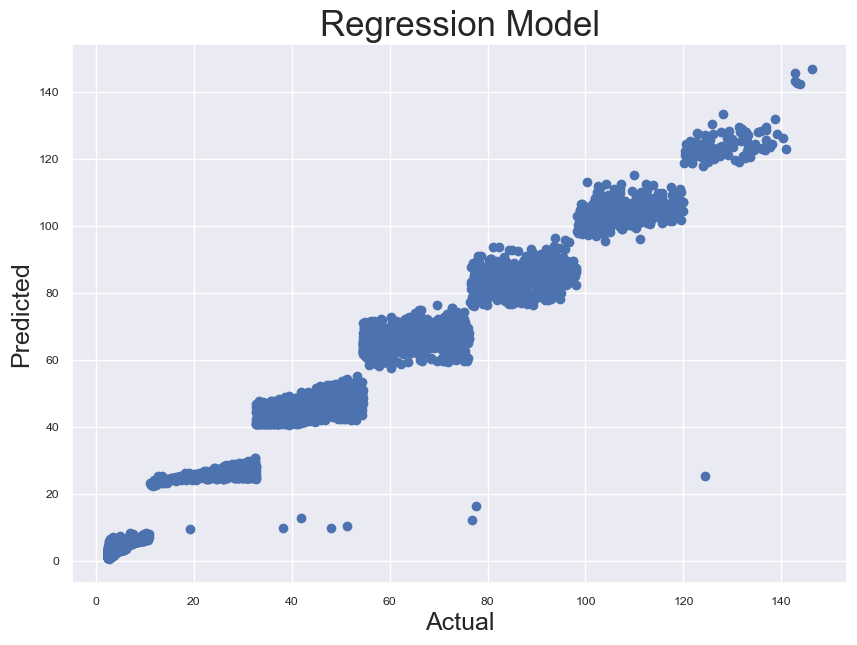

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Regression Model", fontsize=25)
plt.show()


**Lasso Regression Model**

In [47]:
degree = 6

poly = PolynomialFeatures(degree)
poly_X_train = poly.fit_transform(X_train)
poly_X_val = poly.transform(X_val)
poly_X_test = poly.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(poly_X_train, y_train)

y_pred_val = linear_reg.predict(poly_X_val)
mse_val = metrics.mean_squared_error(y_val, y_pred_val)
r2_val = linear_reg.score(poly_X_val, y_val)

print("Hyperparameters:")
print("Polynomial Degree:", degree)
print('Mean Squared Error (Validation):', mse_val)
print('R-squared Score (Validation):', r2_val)

y_pred_test = linear_reg.predict(poly_X_test)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
r2_test = linear_reg.score(poly_X_test, y_test)

print('Mean Squared Error (Testing):', mse_test)
print('R-squared Score (Testing):', r2_test)

Hyperparameters:
Polynomial Degree: 6
Mean Squared Error (Validation): 296407202140.30884
R-squared Score (Validation): -268368067.50367945
Mean Squared Error (Testing): 31275019312.068924
R-squared Score (Testing): -27154272.799535878


Model Evaluation

In [196]:
print('Ridge Regression Model')
mean_squared_error = metrics.mean_squared_error(y_test, y_pred_test)
print('Squared mean error:', round(np.sqrt(mean_squared_error), 2))
print('R squared training:', round(best_model_lasso.score(X_train, y_train), 4))
print('R squared testing:', round(best_model_lasso.score(X_test, y_test), 4))

Ridge Regression Model
Squared mean error: 2.17
R squared training: 0.9961
R squared testing: 0.9958


Actual vs. Predicted Scatter Plot

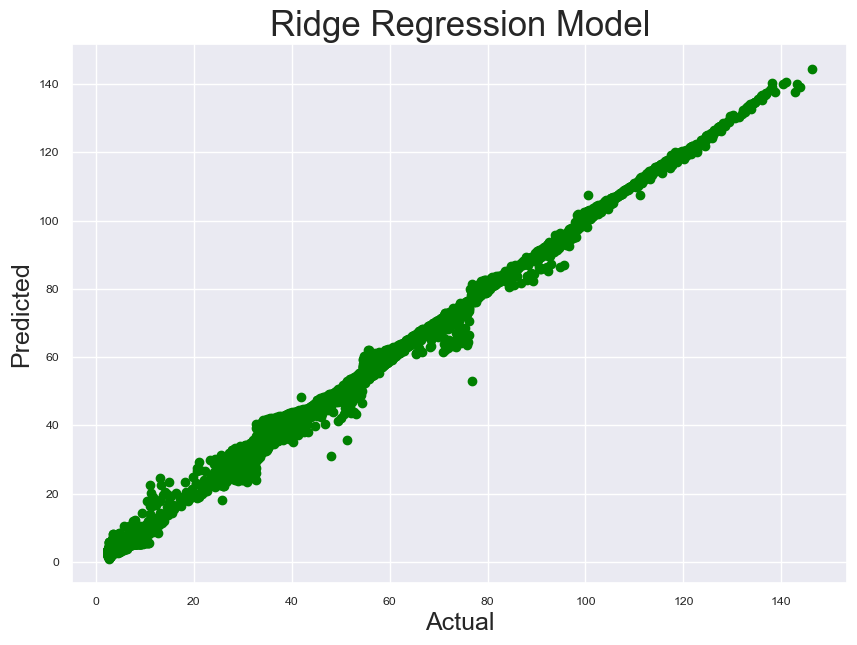

In [172]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_test, color='green')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Ridge Regression Model", fontsize=25)
plt.show()


Loss Function Plot (Learning Curve)

In [ ]:
train_mse = best_model_lasso.history['loss']

val_mse = best_model_lasso.history['val_loss']

# Plotting the MSE over epochs
plt.plot(train_mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.title('Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Ridge Regression Model** 

In [30]:
from sklearn.linear_model import Ridge

degree = 2
poly = PolynomialFeatures(degree)

ridge_poly = make_pipeline(poly, Ridge())

param_grid = {'polynomialfeatures__degree': [3],
              'ridge__alpha': [0.1]}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=ridge_poly, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model_ridge = grid_search.best_estimator_

y_pred = best_model_ridge.predict(X_test)

print("Best hyperparameters:", grid_search.best_params_)

mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = best_model_ridge.score(X_test, y_test)
print('R-squared Score:', r2)

Best hyperparameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1}
Mean Squared Error: 2.2269602192208664
R-squared Score: 0.9980664604254916


In [93]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Import XGBoost
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

random_forest = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 200]}
kf = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=kf, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)

xgb_model = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=kf, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_model_xgb.predict(X_test)

y_pred_stacked = np.mean([y_pred_rf, y_pred_xgb], axis=0)

mse_stacked = mean_squared_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

print("Stacked Model Metrics:")
print('Mean Squared Error (Stacked Model):', mse_stacked)
print('R-squared Score (Stacked Model):', r2_stacked)


Stacked Model Metrics:
Mean Squared Error (Stacked Model): 0.9369472457534779
R-squared Score (Stacked Model): 0.9991865033945129


In [65]:
ylasso_pred=best_model_rf.predict(X_test)

In [66]:
lasso_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ylasso_pred,'Difference':y_test-ylasso_pred})
lasso_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
17/08/2018 17:30,40.28,40.5134,-2.334000e-01
22/02/2018 10:45,89.10,88.5654,5.346000e-01
11/8/2018 0:30,2.81,2.8100,-1.776357e-15
28/08/2018 09:00,45.90,48.1055,-2.205500e+00
15/07/2018 05:45,2.81,2.8100,-1.776357e-15


Model Evaluation

In [57]:
print('Lasso Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,ylasso_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lasso.score(X_train,y_train),4))
print('R sqaured testing',round(lasso.score(X_test,y_test),4) )

Lasso Regression Model
Sqaured mean error 4.45
R squared training 0.9756
R sqaured testing 0.9825


Actual vs. Predicted Scatter Plot

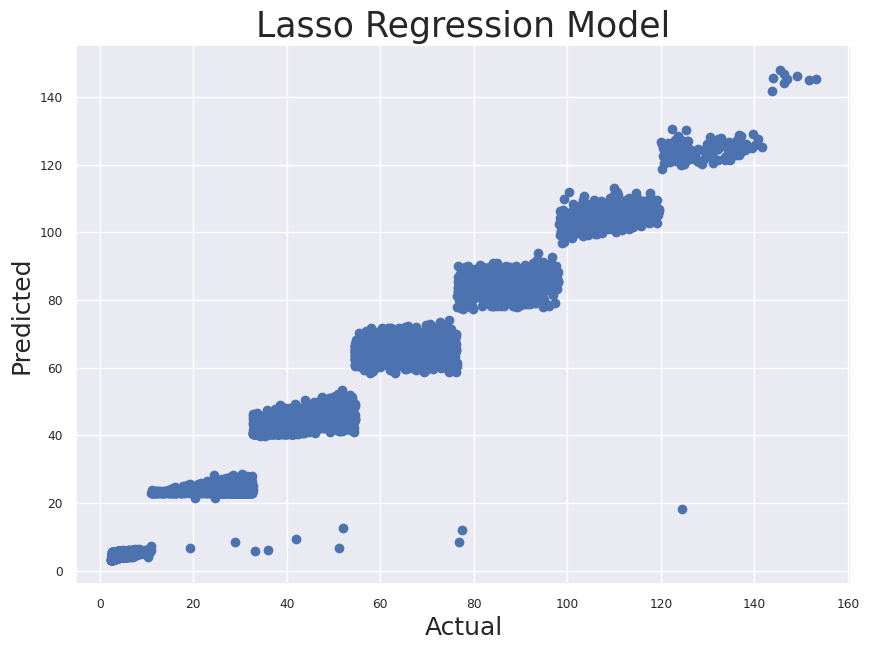

In [149]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, ylasso_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Lasso Regression Model", fontsize=25)
plt.show()



**ElasticNet Regression Model** 


In [150]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet(alpha=0.5)
elasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.5)

In [151]:
yelasticNet_pred=elasticNet.predict(X_test)

In [152]:
elasticNet_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yelasticNet_pred,'Difference':y_test-yelasticNet_pred})
elasticNet_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,4.245874,-1.365874
26543,60.77,72.963287,-12.193287
2445,120.42,110.137992,10.282008
14649,3.13,1.770972,1.359028
32699,58.86,57.339843,1.520157


Model Evaluation

In [153]:
print('ElasticNet Regression model')
mean_squared_error=metrics.mean_squared_error(y_test,yelasticNet_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(elasticNet.score(X_train,y_train),4))
print('R sqaured testing',round(elasticNet.score(X_test,y_test),4) )

ElasticNet Regression model
Sqaured mean error 6.76
R squared training 0.9566
R sqaured testing 0.9592


Actual vs. Predicted Scatter Plot

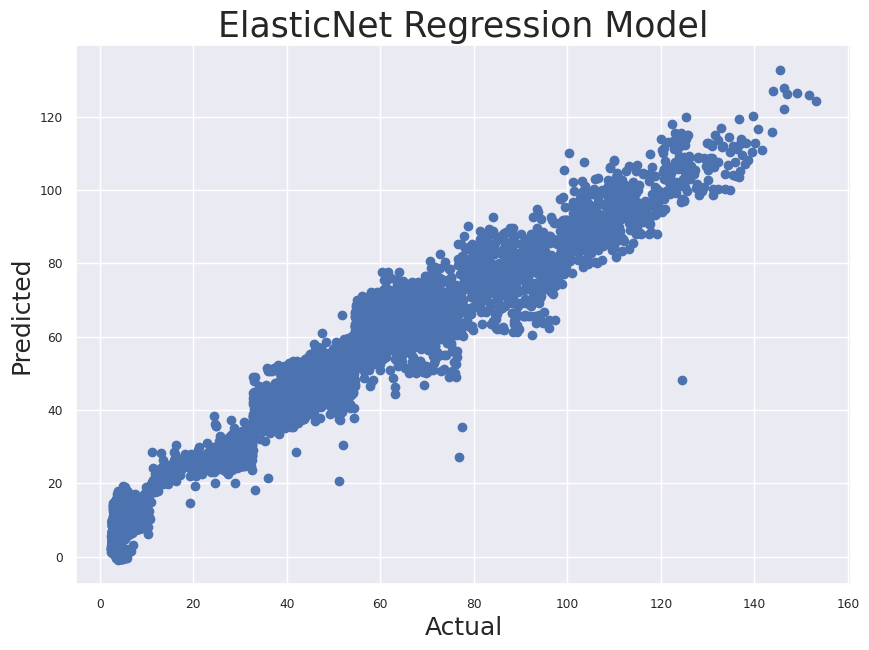

In [154]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yelasticNet_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("ElasticNet Regression Model", fontsize=25)
plt.show()


**Support Vector Regression Model**

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [22]:
yregressor_pred = regressor.predict(X_test)
regressor_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yregressor_pred,'Difference':y_test-yregressor_pred})
regressor_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
12/8/2018 5:30,2.74,2.801148,-0.061148
19/09/2018 08:00,4.90,4.867736,0.032264
17/06/2018 02:00,2.81,2.821500,-0.011500
13/06/2018 16:00,3.60,5.037221,-1.437221
26/08/2018 20:45,3.10,3.184966,-0.084966


In [23]:
print('Support Vector Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yregressor_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train,y_train),4))
print('R sqaured testing',round(regressor.score(X_test,y_test),4) )

Support Vector Regression Model
Sqaured mean error 2.64
R squared training 0.9932
R sqaured testing 0.9938


Actual vs. Predicted Scatter Plot

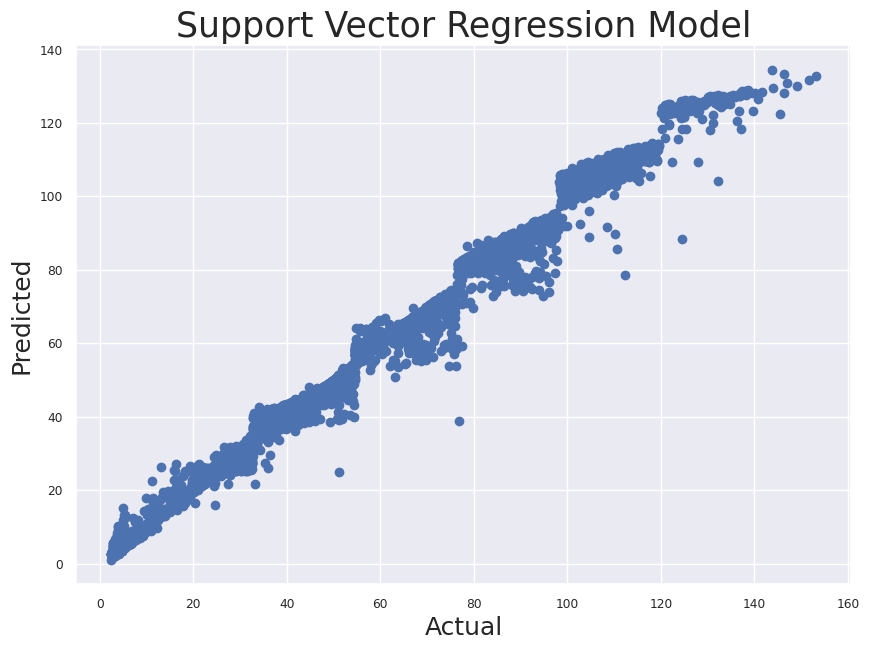

In [158]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test,yregressor_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Support Vector Regression Model", fontsize=25)
plt.show()

**Regression Models Comparison**

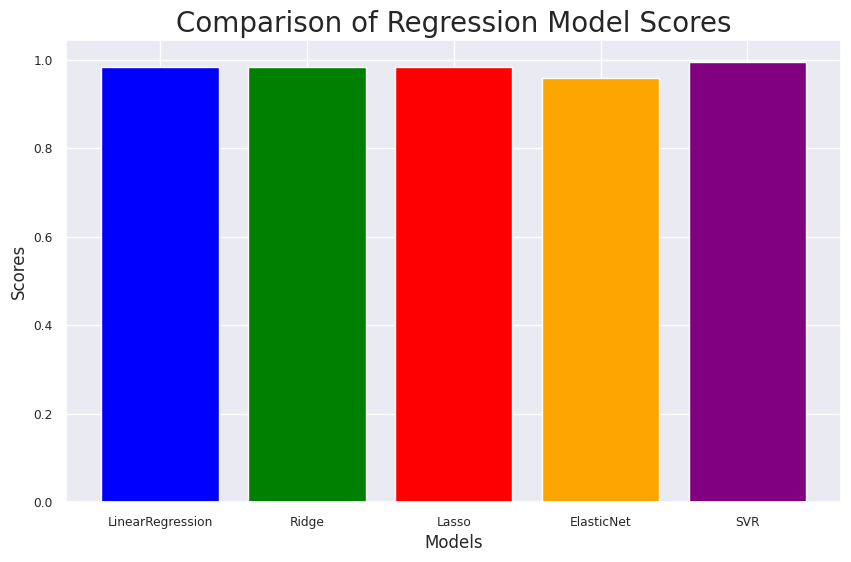

In [159]:
# Comparison of Regression Model R2 Scores
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'SVR']
score = [lr.score(X_test, y_test),
         ridge.score(X_test, y_test),
         lasso.score(X_test, y_test),
         elasticNet.score(X_test, y_test),
         regressor.score(X_test, y_test)]
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(models, score, color=colors)
plt.xlabel('Models',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.title('Comparison of Regression Model Scores',fontsize=20)
plt.show()


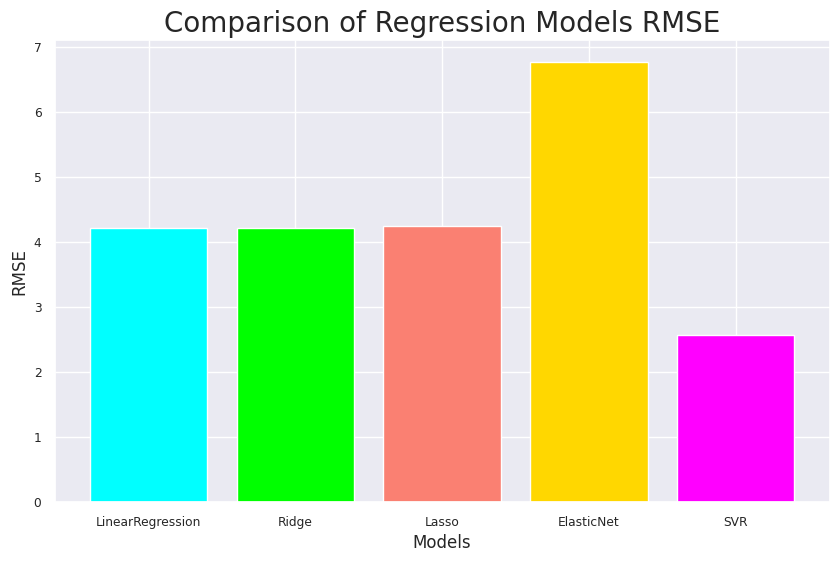

In [160]:
# Comparison of Regression Models RMSE
rmse = [np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yridge_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, ylasso_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yelasticNet_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yregressor_pred))]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color=['cyan', 'lime', 'salmon', 'gold', 'magenta'])
plt.xlabel('Models',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.title('Comparison of Regression Models RMSE',fontsize=20)
plt.show()


In [94]:
testing_data = pd.read_csv('data/test.csv')
testing_data = testing_data.set_index('date')
testing_data = testing_data.drop(['Id', 'Day_of_week','NSM'], axis=1)

In [95]:
numerical_cols_test = testing_data.select_dtypes(include=[np.number]).columns.tolist()

# Remove the Id, date, and target column
numerical_cols_test = [col for col in numerical_cols_test if col not in ['date']]

scaler_test = StandardScaler()

testing_data[numerical_cols_test] = scaler_test.fit_transform(testing_data[numerical_cols_test])

In [96]:
numerical_cols_test

['Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor']

In [97]:
testing_data = pd.get_dummies(testing_data)

In [98]:
testing_data

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,
19/10/2018 16:00,3.293564,-0.542462,2.588771,0.064562,0.529035,True,False,False,True,False
19/10/2018 16:15,2.685094,-0.542462,1.933952,0.130005,0.529035,True,False,False,True,False
19/10/2018 16:30,2.740176,-0.542462,1.933952,0.130005,0.529035,True,False,False,True,False
19/10/2018 16:45,1.546293,-0.542462,1.279133,0.060959,0.529035,True,False,False,True,False
19/10/2018 17:00,1.467512,-0.542462,1.279133,0.117997,0.529035,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
31/12/2018 23:00,-0.473829,-0.542462,-0.685323,-1.261712,0.529035,True,False,True,False,False
31/12/2018 23:15,-0.545564,-0.542462,-0.685323,-0.744772,0.529035,True,False,True,False,False
31/12/2018 23:30,-0.582073,-0.532716,-0.685323,-0.389938,0.528384,True,False,True,False,False


In [99]:
testing_data = testing_data.drop(['Load_Type_Medium_Load','WeekStatus_Weekend','WeekStatus_Weekday'], axis=1)

In [100]:
testing_data

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,Load_Type_Light_Load,Load_Type_Maximum_Load
date,,,,,,,
19/10/2018 16:00,3.293564,-0.542462,2.588771,0.064562,0.529035,False,True
19/10/2018 16:15,2.685094,-0.542462,1.933952,0.130005,0.529035,False,True
19/10/2018 16:30,2.740176,-0.542462,1.933952,0.130005,0.529035,False,True
19/10/2018 16:45,1.546293,-0.542462,1.279133,0.060959,0.529035,False,True
19/10/2018 17:00,1.467512,-0.542462,1.279133,0.117997,0.529035,False,True
...,...,...,...,...,...,...,...
31/12/2018 23:00,-0.473829,-0.542462,-0.685323,-1.261712,0.529035,True,False
31/12/2018 23:15,-0.545564,-0.542462,-0.685323,-0.744772,0.529035,True,False
31/12/2018 23:30,-0.582073,-0.532716,-0.685323,-0.389938,0.528384,True,False


In [101]:
y_test_pred_stacked_rf = best_model_rf.predict(testing_data)
y_test_pred_stacked_knn = best_model_xgb.predict(testing_data)

X_test_stacked = np.column_stack((y_test_pred_stacked_rf, y_test_pred_stacked_knn))

y_test_pred_final = np.mean(X_test_stacked, axis=1)

c:\Users\tbtw0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [109]:
from sklearn.metrics import r2_score, mean_squared_error

answers_df = pd.read_csv("data/answer.csv")
actual_values = answers_df["Usage_kWh"]

mse_final = mean_squared_error(actual_values, y_test_pred_final)
r2_final = r2_score(actual_values, y_test_pred_final)

print("Stacked Model Metrics on Testing Data:")
print('Mean Squared Error (Stacked Model):', mse_final)
print('R-squared Score (Stacked Model):', r2_final)

testing_data['Usage_kWh'] = y_test_pred_final
testing_data.to_csv('test_pred.csv', index=False)

Stacked Model Metrics on Testing Data:
Mean Squared Error (Stacked Model): 4.19727512002768
R-squared Score (Stacked Model): 0.9957445713908116
